# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

In [3]:
#%run -i agent

**Answer:**

The agent (smart cab) does not move at all during this simulation, because it is set by default not to move yet. The agent is receiving some positive rewards and some negative rewards. The positive rewards are given because it happens in some simulations that the right thing to do is not to move i.e. in a red light (and accidentally our agent is rewarded because is not moving), and the negative rewards are given because it happens in some simulations that the right thing to do is to move i.e. in a green light (and our agent isn't moving). The more we simulate the game and the agent remains idle, the more positive and negative rewards we are receiving due to the light change from green to red and back, repeatedly. 

By looking at some of the results right above, you will notice for example that the agent is being awarded 2.83 points for staying idle in a red light, but the more the time passes, the earned points are decreasing to 1.68, until eventually they become negative points cause the light is now green, etc. This behavior is normal at the moment as the agent is not set to learn, thus will remain put until we set it into learning mode.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

1) Three flags (parameters) that can be set and influence the results of the simulation directly are the following:

   * 'learning' : This parameter is by default set to 'False'. If we set it to 'True' then we enable the agent to start learning and interacting with its environment, instead of sitting idle and doing (learning) nothing
   
   * 'epsilon' : This parameter is by default set to 1.0 and describes how daring the agent will be in exploring its environment. That is, 'epsilon' is an exploration metric, and the higher its value, the more random decisions our agent is likely to take in order to explore its environment.
   
   * 'alpha' : This parameter is by default set to 0.5 and describes the learning rate of the process. The closer 'alpha' gets to 1, the more the agent will focus on learning from its past actions, versus exploring new things. 
   
2) The function called everytime the agent performs an action is 'act()', which basically says: "Consider an action and perform the action if it is legal. Receive a reward for the agent based on traffic laws."

3) The main differences are:

   * 'render_text' : "This is the non-GUI render display of the simulation. Simulated trial data will be rendered in the terminal/command prompt." ~> will output in command line
   
   * 'render' : "This is the GUI render display of the simulation. Supplementary trial data can be found from render_text." ~> will output in GUI 
   
4) The function 'next_waypoint' will consider East-West directions first, and then North-South directions. In particular, the function will check the following in order:

   * "First check if destination is at location"
   
   * "Next check if destination is cardinally East or West of location"
   
   * "Finally, check if destination is cardinally North or South of location"

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


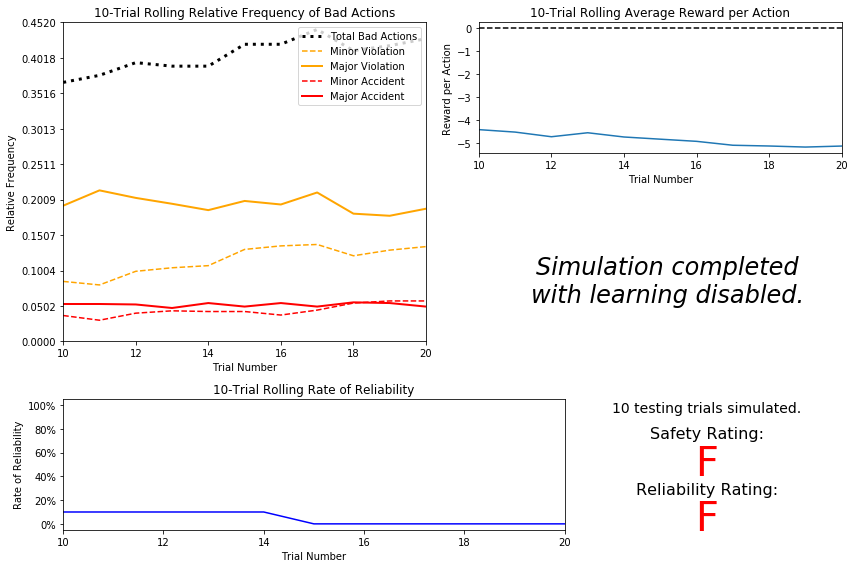

In [6]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

1) As per the first diagram, the driving agent makes a bad action an average of 41% of the times, which consists of about 17% major violations, an average of 12.5% minor violations, 4+% minor accidents, and about 7% major accidents. That is, about 11%-12% of these bad decisions of the agent cause a minor or a major accident. 

2) Yes. Given that the agent is driving randomly, we would expect that about half of the times the agent would make a bad decision, thus causing some sort of violation. Indeed the agent is making a violation about 40+% of the times, which is a consistent rate to the agent's random drive. Notice that the rate of reliability is gradually increasing after the 14th trial from abour 10% up to 40%, which is a decent change. However, since the agent is not learning yet, this increase is mostly due to luck and under no circumstances implies that as n_trials -> infinity the reliability will increase, cause as mentioned above the agent is making decision almost randomly, and is not learning in time.

3) The agent is receiving negative rewards for these actions exclusively, which makes sense because it drives randomly, causes violations (minor and major ones) quite often, and even if it doesn't cause a violation we would still expect to get a negative reward for not choosing optimally. Notice that as the reliability improves after a point it reflects to the total value of the rewards which is also increasing a little from about -5 to -4. The heavy penalties in the rewards are generated mostly by the major/minor accidents that happened in the first 5-10 trials, and as they are decreasing in the later trials, the value of rewards (which is inverse) is increasing respectively. 

4) The outcome looks like having a trend, but doesn't change significatly. It mostly jumps around its average value, which is expected as it's not set to learn anything, instead it takes random decisions. However as per the diagrams above, it looks like the violations are decreasing on average (look at the total violations line in the diagram), the rewards are increasing a little, and the reliability as well increases. Notice that rewards = factor1 * violations + factor2 * reliability, that is, the rewards are dependent of the performance of the agent with respect to how many violations are happening and how fast it reaches the destination. **Thus an increasing/decreasing trend should be apparent in all diagrams**

5) The smartcab at this point is totally unsafe and completely unreliable to drive anyone around. It looks fun to watch in the simulated pygame universe, but beyond that it's a bad idea for someone to hire that cab and start venturing the city from the back seat. As mentioned above, the reasons are that the cab will almost surely cause many violation, some of which would be major accidents, and even if survives all that, it will still not make it on time. This is not the expected service from a smart cab. It's not smart at all yet. 

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

At a glance, all these features are important and factor in the success rate of the smartcab training process. But with a closer look, I conclude the following:

1) **Safety**-relevant features:

   * 'inputs' affects the safety outcome of the smartcab because this set of variables include all the necessary information that gives the smartcab direction. It is crucial to learn about red and green lights ('light'), as well as when the smartcab should turn left, right or keep going straight ahead. 
   
2) **Efficiency**-relevant features:

   * 'deadline' affects the efficiency of the smartcab because the less steps (number of actions) are available for the smartcab to reach its destination, the more motivation the smartcab has to reach the destination as fast as possible. If there is a large number of available steps then there is no reason for the smartcab to pick a best policy etc. "motivation" and "reason" in this context means computational reward. 
   
   * 'waypoint' affects the efficiency of the smartcab because in every step it describes the direction the smartcab should be heading towards, without which it would be impossible to set a goal. That is, you can still have a smartcab to wander around the city in absolute safety by taking the right actions all the time, but this wouldn't be efficient without having a destination, it would just be a meaningless ride and waste of resources. 
   
However, keep in mind that for efficiency we are giving negative rewards so that to enforce the agent to move faster, and a 'deadline' feature although does affect reliability (efficiency) it might harm the safety as the number of steps decreases. That is, the agent might make a wrong choice in order to comply to the deadline. 

Similarly, notice that the driving environment is set to be in the United States, where turning on the right on a red light is legal. Thus, in order to improve efficiency, we might need to omit 'inputs-right' feature and come up with an appropriate reward so that in time our agent will learn that occasionally is good to make a right turn on a red light. 

In detail:

**Features to be used for the agent's learning process**

1) 'waypoint' -- the agent needs to know the direction all times in order to decide appropriately

2) 'light' -- the agent needs to learn what to do when a traffic light is green or red. This is crucial to learn how to prevent accidents and violations

3) 'inputs-left' -- the agent needs to learn when to make a left. Notice that left is more important than right in this case, cause there are no exception on where and when a driver needs to turn left. For example, the agent needs to learn that we turn left only if we have green light and taking a left turn leads us closer to the destination versus another action

4) 'inputs-oncoming' -- same and analogous reason as with 'inputs-left'


**Features to be excluded from the agent's learning process**

1) 'deadline' -- as we approach the destination having a strict deadline pushing us might lead to rushed actions that might lead into violations and accidents, thus harming the safety grade. Nevertheless, by giving negative rewards for "slacking" in an intersection, we "motivate" the agent to keep moving thus wanting to reach the destination.

2) 'inputs-right' -- since our environment is defined under the US traffic rules and laws, we sort of want our agent to learn to take a right turn on the red light, as long as this won't cause an accident. If we enforce the agent not to do so, then it might harm the reliability grade.
   

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

In order to answer this questions we need to compute the number of all possible combinations of the features of the state space. First we need to count how many options we have for each feature:

   * waypoint = { left, right, forward } => |waypoint| = 3
   
   * light = { green, red } => |light| = 2  
   
   * oncoming = { none, left, right, forward } => |oncoming| = 4
   
   * left = { none, left, right, forward } => |left| = 4
   
Then, the cardinality of the state space is the product of all this options of each feature, namely:

Size of State Space = | State Space | = |waypoint| x |light| x |oncoming| x |left| = 3 x 2 x 4 x 4 = 96

This is not such a large number to assume computationally, and even if the learning algorithm happens in O(n^2) it wouldn't be too terrible (although relatively slow). Anything better than O(n^2) would be just fine for our purposes, so I think **it's fine for the agent to learn a policy in this state space**. 

However, if we start adding more features, the size of the state space would increase exponentially. In particular, the addition of any binary-valued feature would double the amount of the computations needed, and after a short point it might be infeasible to parse the state space (even with logarithmic complexity) and thus the agent wouldn't be able to "learn" in that case.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

In [1]:
#%run -i agent

Indeed, once I created a tuple of states, now the states are printed right above the rewards!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

In [3]:
#Run about 20 trials, and 10 tests
#%run -i agent

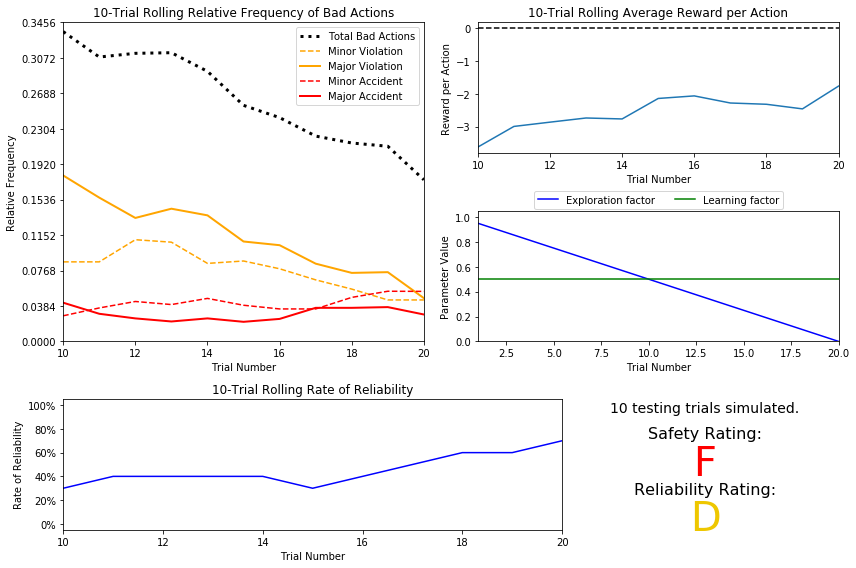

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

1) The rate of reliability is similar to what it was in Question 3, about 15%-20%, however, the total number of violations is rapidly decreasing and as a result the total rewards are rapidly increasing as the number of trials grows. Another similarity is that the safety grade is still F, however the reliability grade improved a little and now is D. 

2) The number of trials depends on the tolerance we choose to achieve. Thus for epsilon = 0.05 that would be 1/0.05 = 20 training trials, which is what we get -> it makes sense and is consistent.

3) The decay function I chose was the suggested linear g(t) = t - 0.05, which decays linearly. This is clearly reflected from the parameter graph above, which shows a constant (linear) decay and approaches zero at a constant rate. 

4) The number of bad actions decrease rapidly as the number of trials increases. In particular, from the 10th trial to the 20th trial the total number of violations decreased 75%, the major violations decreased about 92%, and the major accidents decreased about 66%. This is great progress and correspondigly the rewards from the 10th trial to the 20th trial went up from an average of -2 to +1 -> on average we gain positive rewards overall.

5) The Safety and Reliability ratings are F and D, which makes sense cause an average of 40%-50% reliability and a good 5% of total violations is not exactly a safe and reliable smartcab. Of course there has been a major improvement than before, but still. 

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

In [14]:
#%run -i agent

# n_test = 100
# tolerance = 0.0001

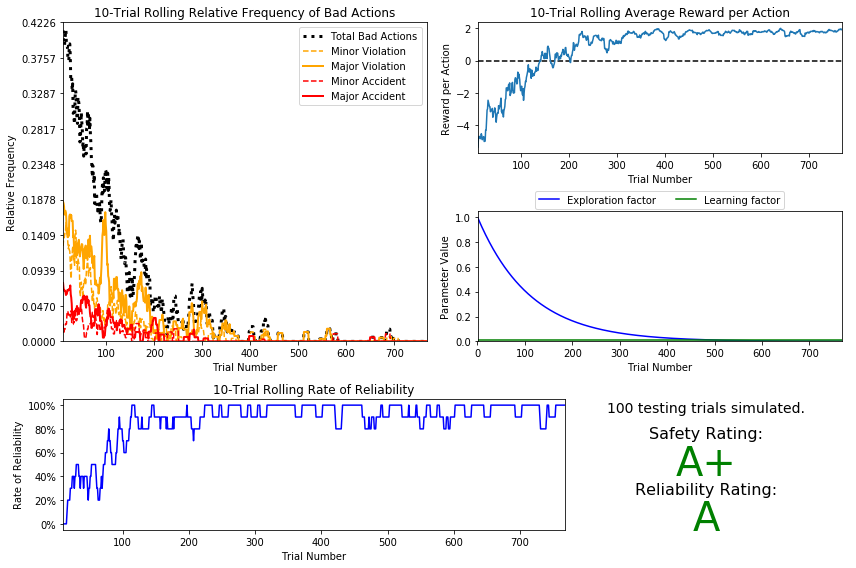

In [13]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

1) I experimented with a few functions but eventually I decided to use the inverse exponential cause apparently it describes an ideal decay so that with the appropriate choice of alpha it gives a good deal of time for the agent to learn. A decay function such as 1/t^2 would decay too rapidly giving little time to the agent to learn, and a decay function such as 1/t would be too slow and take forever to converge (after 3000 trials it was still going on). The inverse exponential was gave the appropriate, smooth decay that was needed

2) With a choice of alpha = 0.009, epsilon = 1 decaying inverse exponentially, and a tolerance for convergence = 0.001 it took about 700 trials for training. 

3) I used alpha = 0.009 and epsilon-tolerance = 0.001. Keep in mind that alpha is the learning rate which describes how fast the agent learns, and basically gives alhpa weight to the exploration process, and 1-alpha weight to the learning process. As alpha -> 1, we weight more the exploration part and less the learning part of the equation. Since we are interested in training the agent how to learn, I choose a small value like 0.009 to value the learning process more. The epsilon-tolerance describe the accuracy rate that is satisfying enough for the algorithm to claim convergence. A small epsilon-tolerance implies more training trials and thus more accurate convergence, thus after some experimentation I concluded that the value of 0.001 works pretty well for our purposes. Notice that other values in the neighborhood of 0.009 (for alpha) and in the neighborhood of 0.001 (for tolerance) would still give us A+/A results at this point. 

4) The improvement of the Q-learner is tremendous. From F in both safety and reliability, with the appropriate change of parameters and decay function I achieved an A+ and an A in safety and reliability. The total number of violations dereased from its former average of 40+% percent to almost 0% while the average reward values, formerly being almost always negative, converged to about +2 => hence the A+ safety grade. Also, the inverse exponential curve is the smoothest of all the previous choices, and the rate of reliability from about 20+% now went up and converged almost to a perfect 100%, hence the A reliability grade.

5) Yes, it looks like the driving agent within minutes can be trained to drive appropriately in this simulated universe. "Driving appropriately" means that is making the right choices every time, knows what set of actions will lead to a long term benefit, and values both speed and safety in the process. 

6) Yes, I think and A+ in safety and an A in reliability are pretty good results. I wouldn't worry too much about getting an A+ in the reliability, since an arbitrarily slower smartcab will be acceptable. Safety on the other hand is of paramount importance and anything less than A+ is unacceptable for me. 

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

State dictionary: (waypoint, inputs(light), inputs(left), inputs(right), inputs(oncoming))


1) Each environment and country has its own set of traffic rules. Since we are in the US, one right-of-way kind of rule that applies is that drivers can take a turn on a red light if there is no coming traffic. Some examples with our current environment and variables could be:

   * With light = red and waypoint != right, then the optimal policy should give "None" action for output (highest score)
   
   * With light = red and waypoint = right, then the suboptimal policy should give "Right" action for output (less score)
   
   * With light = red and waypoint = forward, then a false policy should give "Forward" action for output (nevative points)
   
   * With light = green and waypoint = left, then a suboptimal and probably false policy should give "Right" action for output (negative or little reward)
    
In general, we are trying to enforce the smartcab to "learn" in the same way we learn, and we always try to find and learn the best way to accomplish something (best policy). It's comes down on weighting a bunch of positive and negative rewards with respect to the final destination, considering how each of our choices now will lead to a long-term maximum benefit over other possible long-term benefits (best policy). The way we "weight" and try to maximize these rewards is dependent upon a set of environment parameters. Each environment (country, terain, weather conditions, traffic rules etc.) has its own set of rules that we need to comphrehend and consider in the way we distribute the rewards. For example if there is not bridge across a 100 feet wide river and the regular road takes us 200 miles south in order to cross, obviously it will be better for us to decide and do that thinking long-term. That is, if we try to cross and drawn or completely waste our car in the process, then long term we lose more that we earn by getting there fast. Reinforcement learning is all about making a machine "thinking" that way, using constraints and maximization => the max long term value (which is described by the optimal policy) wins. 


2) and 3) Let's see some of the results of the improved simulation txt and check if they are consistent with the analysis of part 1) right above:

(left, red, forward, forward)
   * forward : -1.78
   * right : -0.18
   * None : 0.28
   * left : -0.71
 
This means that on a red light you shouldn't move. If you go forward would be worse (cause this must be a crossroads) if you move on the right it's gonna be the least worst action since probably it's a legal way to go to, and if you move left then you might get have slightly higher chance to crash than moving to the right. In all cases though, the long-term benefit comes from not crashing at all, that is, not to move on a red light (best policy)


(forward, green, right, None)
  * forward : 0.85
  * right : 0.02
  * None : -0.22
  * left : 0.00
 
In this case we are on a green light, so the we should get negative rewards for choosing to do nothing (None), and we should be rewarded best to choose to go forward, since the waypoint direction in this case is indeed 'forward' (best policy). Apparently, turning right or left is almost similar, and rewards the agent very little (0.02) for choosing right, and nothing (0.00) for choosing left. 
 
 
4) Consider the following case where the agent didn't choose the optimal policy:

(right, green, forward, right)
  * forward : 0.18
  * right : 0.00
  * None : -0.04
  * left : -0.18
 
Here the waypoint (direction) is to go right. Since there is a green light we will get negative rewards if we do nothing (None) which makes sense, and we will get negative rewards if we move to the opposite direction (left), which also makes sense. However, notice that the agent is getting higher reward (0.18) to move forward and no reward (0.00) to move to the correct direction which is right. This means that the agent is perfect enough to always pick the best policy, but it happens that sometimes it might pick a suboptimal policy. This is also reflected by the A grade in reliability and not an A+. Probably with some longer training or better parameter tuning it might resolve such issue, but even if, as you can see the difference would be arbitrarily small.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.